Dataset Shape: (1338, 9)

===== Model Performance Comparison =====
             Model         RMSE  R2 Score
0  Multiple Linear  5796.284659  0.783593
1            Lasso  5835.803276  0.780632
2            Ridge  5802.527042  0.783127


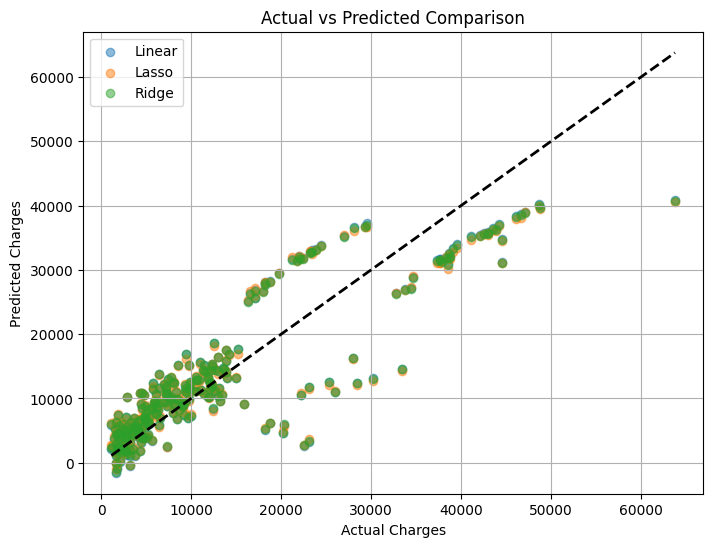

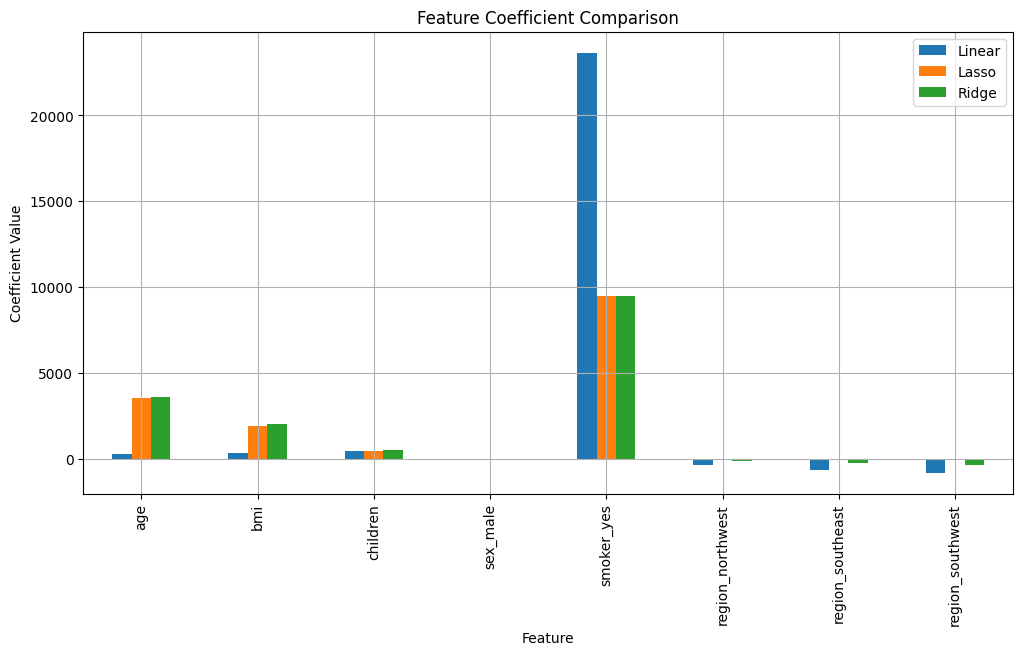


Best Performing Model:
Model       Multiple Linear
RMSE            5796.284659
R2 Score           0.783593
Name: 0, dtype: object


In [5]:
# ============================================
# Insurance Cost Prediction
# Multiple, Lasso & Ridge (Combined)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# 1. Load Dataset
# ===============================

df = pd.read_csv('insurance.csv')

# One-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

X = df.drop('charges', axis=1)
y = df['charges']

print("Dataset Shape:", df.shape)

# ===============================
# 2. Train Test Split
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scaling (for Lasso & Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# 3. Multiple Linear Regression
# ============================================

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

# ============================================
# 4. Lasso Regression
# ============================================

lasso = LassoCV(alphas=np.logspace(-3, 2, 50), cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# ============================================
# 5. Ridge Regression
# ============================================

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# ============================================
# 6. Performance Comparison
# ============================================

results = pd.DataFrame({
    "Model": ["Multiple Linear", "Lasso", "Ridge"],
    "RMSE": [rmse_lin, rmse_lasso, rmse_ridge],
    "R2 Score": [r2_lin, r2_lasso, r2_ridge]
})

print("\n===== Model Performance Comparison =====")
print(results)

# ============================================
# 7. Actual vs Predicted (All Models)
# ============================================

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred_lin, alpha=0.5, label="Linear")
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label="Lasso")
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label="Ridge")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2)

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Comparison")
plt.legend()
plt.grid(True)
plt.show()

# ============================================
# 8. Feature Importance Comparison
# ============================================

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lin_model.coef_,
    "Lasso": lasso.coef_,
    "Ridge": ridge.coef_
})

coef_df.set_index("Feature").plot(kind='bar', figsize=(12,6))
plt.title("Feature Coefficient Comparison")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# ============================================
# 9. Best Model
# ============================================

best_model = results.loc[results["R2 Score"].idxmax()]
print("\nBest Performing Model:")
print(best_model)
